In [20]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from glob import glob
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
import codecs
import jinja2
import json
import os
import itertools
import pandas as pd 
import sklearn
import numpy as np
import nltk
import re




def get_raw_data():
    data=pd.read_csv("/home/administrator/data/categories-data/Train-Data/fps-with-cat-train.csv")
    data['CategoryFB'] = data['CategoryFB'].fillna(data['CategoryV2'])
    data = data.dropna(subset=['Description'])
    return data



class StemTokenizer(object):
    def __init__(self):
        self.ignore_set = {'footnote', 'nietzsche', 'plato', 'mr.'}

    def __call__(self, doc):
        words = []
        for word in word_tokenize(doc):
            word = word.lower()
            w = wn.morphy(word)
            if w and len(w) > 1 and w not in self.ignore_set:
                words.append(w)
        return words


def process_text(counts, vectorizer, text, philosopher, index):
    
    #print(counts, vectorizer, text, philosopher, index)
    
    print(len(vectorizer.get_feature_names()))
    
    result = {w: counts[index][vectorizer.vocabulary_.get(w)]
              for w in vectorizer.get_feature_names()}

    result = {w: c for w, c in result.iteritems() if c > 4}
    #print(result.itervalues())
    normalizing_factor = max(c for c in result.itervalues())

    result = {w: c / normalizing_factor
              for w, c in result.iteritems()}

    return result


def main():
    data = get_raw_data()
    print('Data loaded')
    n = len(data)
    
    data["Description"],data["CategoryV2"]

    vectorizer = CountVectorizer(stop_words='english',
                                 max_df=(n-1) / n,
                                 tokenizer=StemTokenizer())
    
    print(data['CategoryV2'][0])
    print(data['Description'][0])

    counts = vectorizer.fit_transform(text for text in 
                                      data["Description"]).toarray()

    print('Vectorization done.')

    for i, row in data.iterrows():
        result = process_text(counts, vectorizer, row['Description'], 
                              row['CategoryV2'], i)
        loader = jinja2.FileSystemLoader(searchpath='templates')
        env = jinja2.environment.Environment(loader=loader)
        words = json.dumps(result)
        template = env.get_template('wordcloud.jinja2')
        template_data = {'words': words,
                         'width': 1200,
                         'height': 1200,
                         'rescale': 250}
        with codecs.open('/home/administrator/data/categories-data/Train-Data/{}.html'.format(philosopher),
                         'w', 'utf-8') as result_file:
            result_file.write(template.render(template_data))
        print('Processing done for {}'.format(philosopher))


if __name__ == '__main__':
    main()

Data loaded
HARDWARE & SANITARYWARE
Hanuman Enterprises is a Treasure house of Ideas & Solutions for Bathrooms & Interiors. We have an exclusive display of Imported & Indian Tiles, Sanitary Ware, Taps, Tubs, Wall Papers, Vinyl & Wooden Flooring. We assure you quality material with Prompt service as we always believe in having strong business relationship with you.\nWe provide Customized 3-D designing provided for premium bathrooms.\nWe have exclusive Galleries of TOTO,GROHE, DOOA, AMERICAN STANDARD, Imported Tiles.


Vectorization done.
9400


ValueError: max() arg is an empty sequence

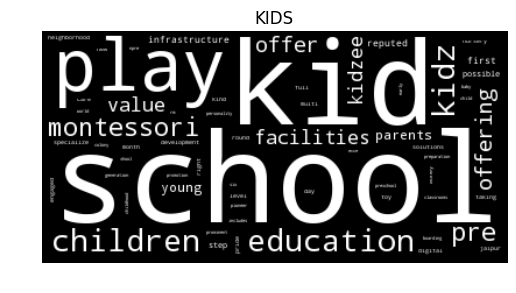

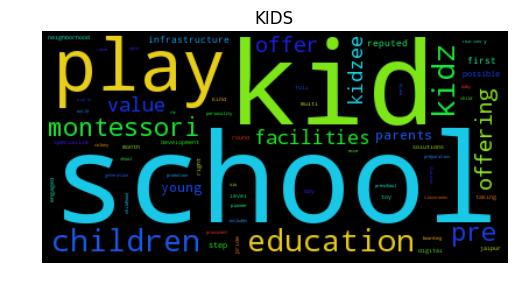

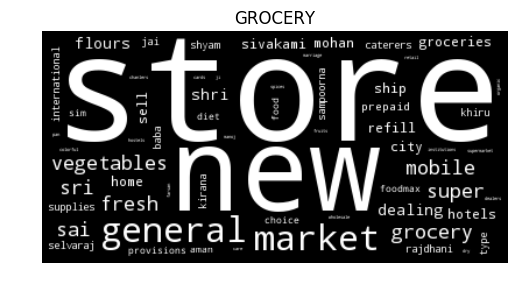

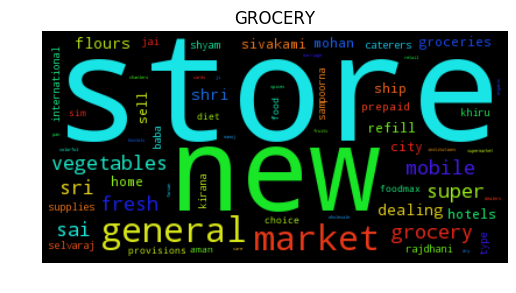

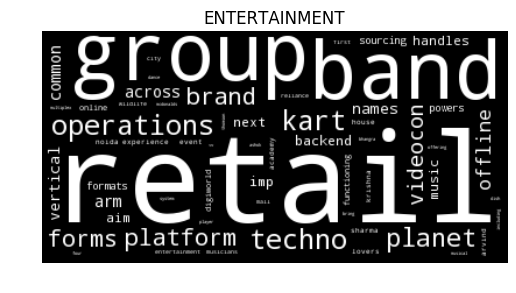

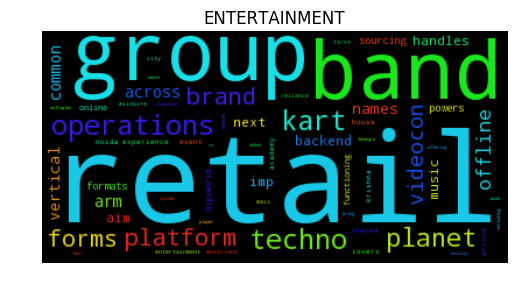

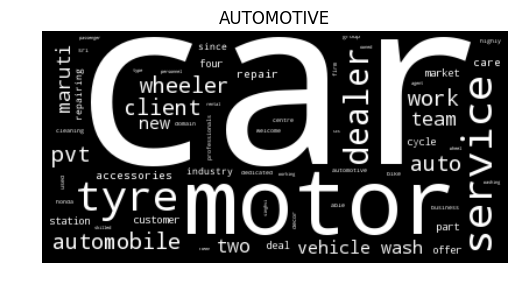

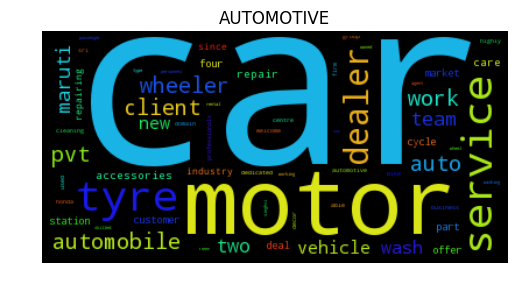

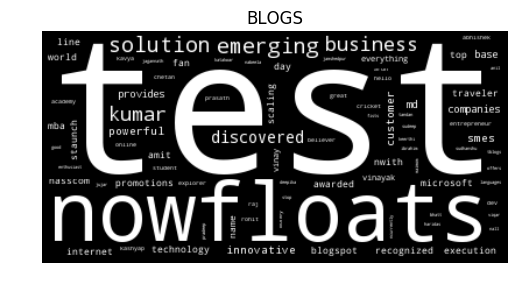

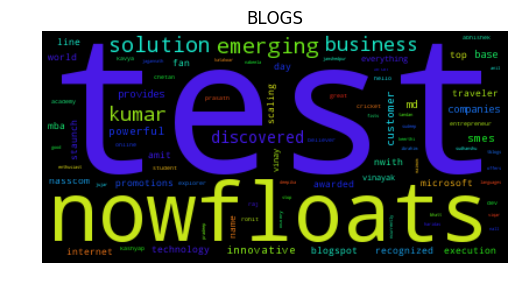

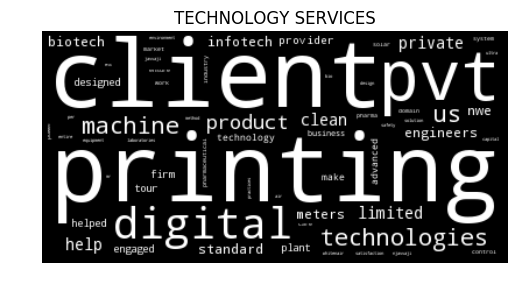

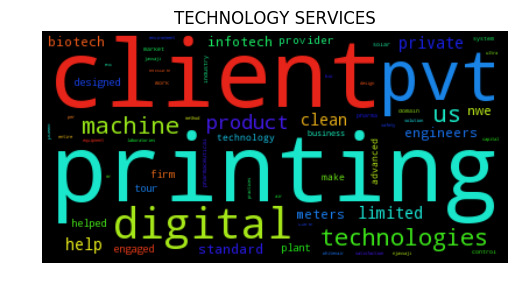

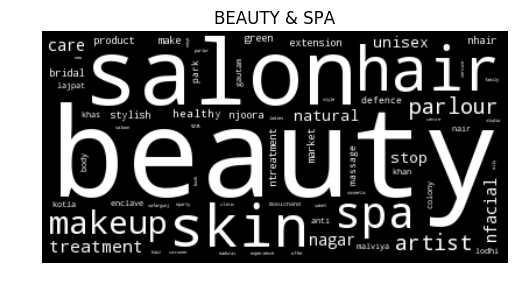

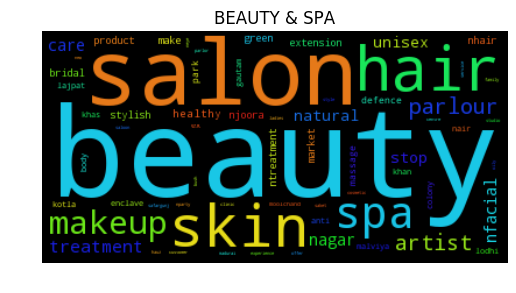

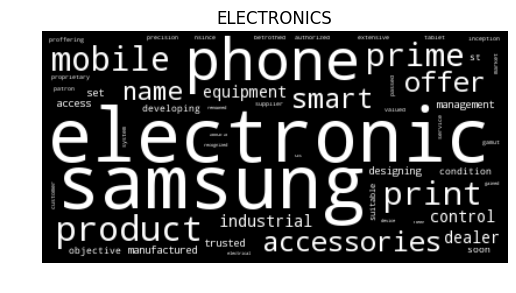

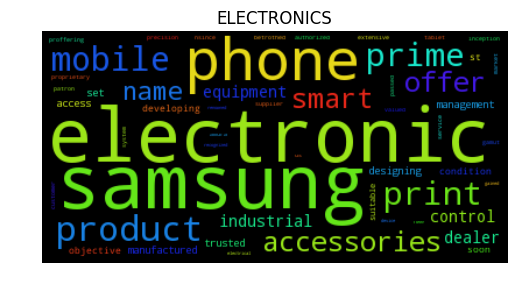

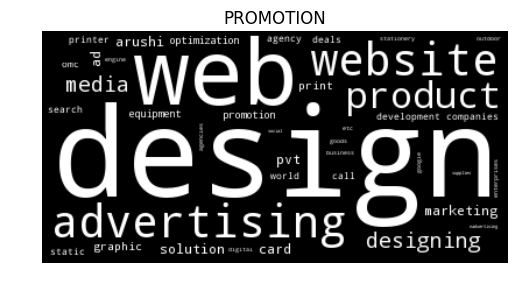

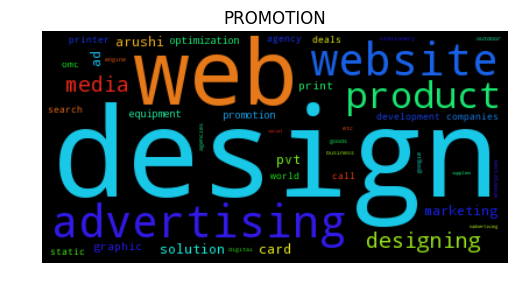

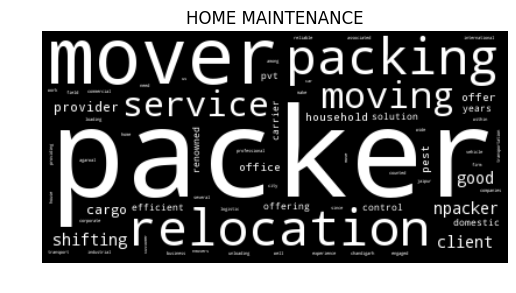

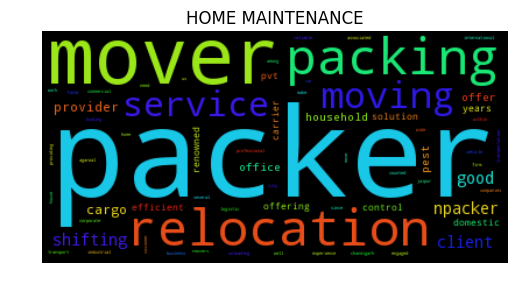

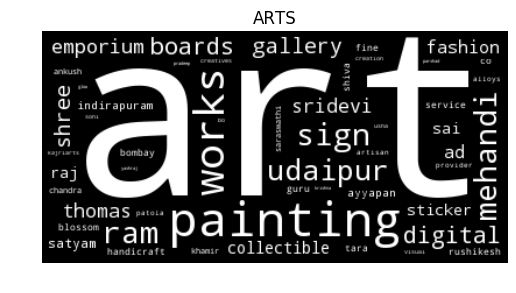

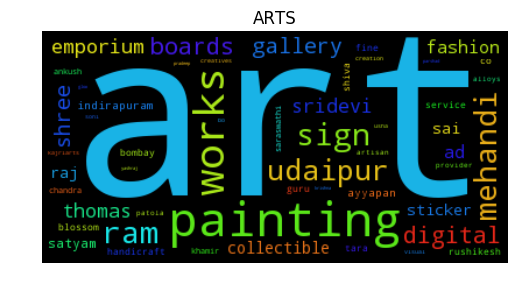

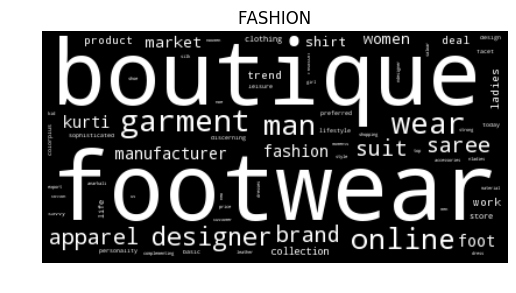

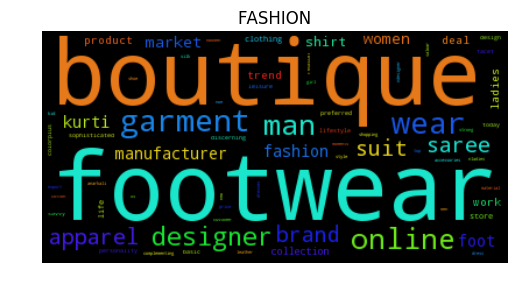

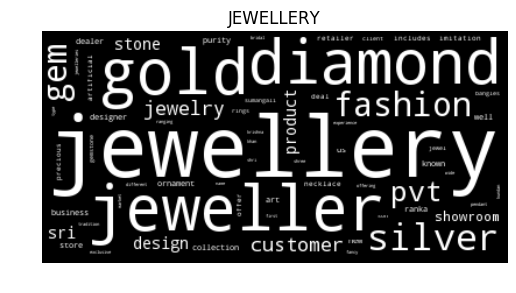

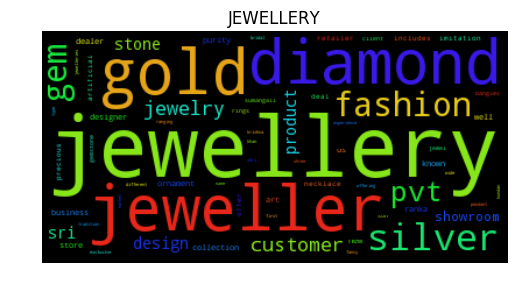

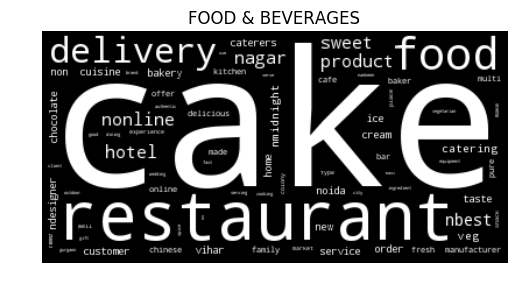

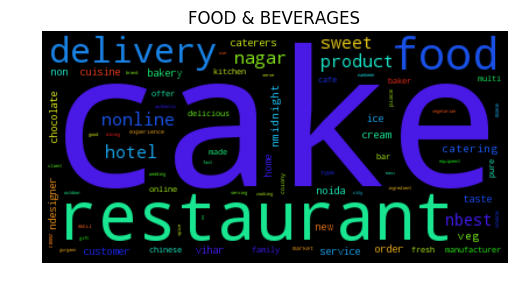

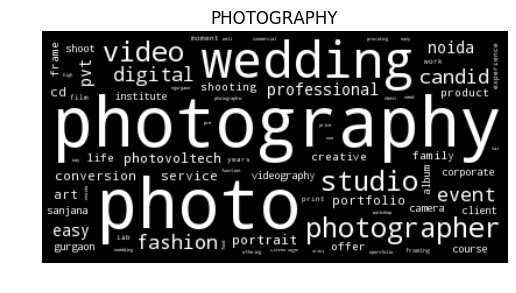

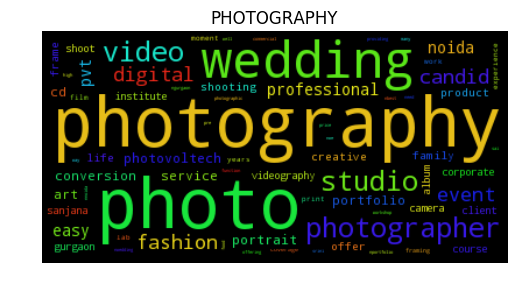

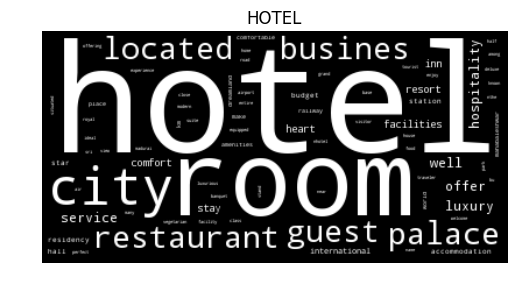

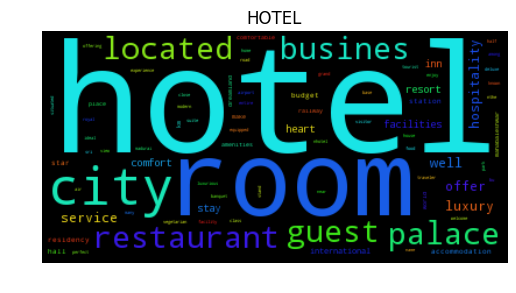

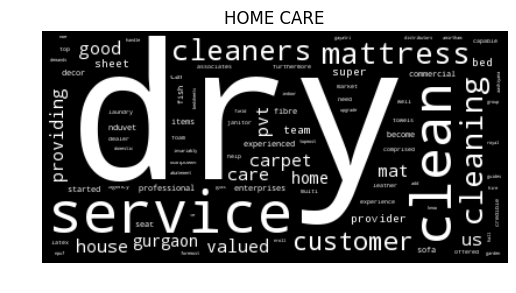

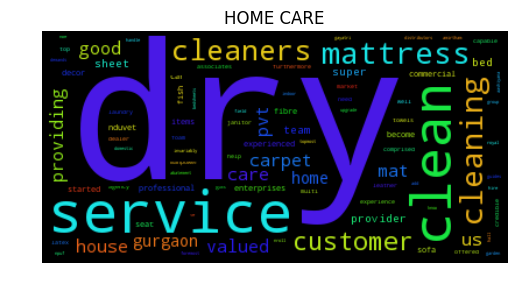

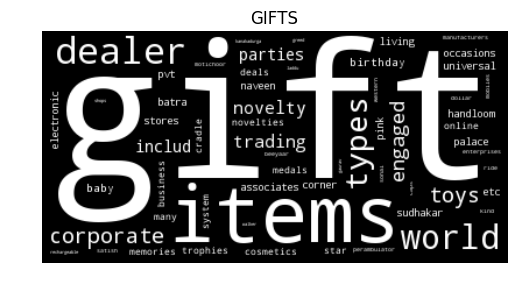

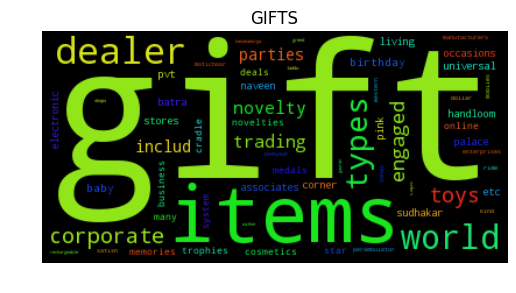

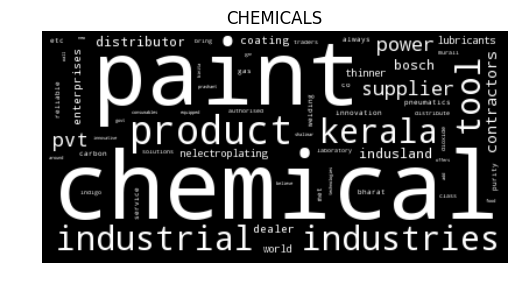

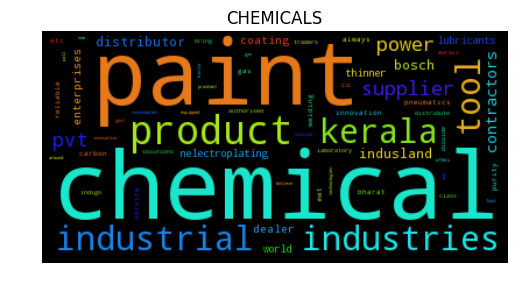

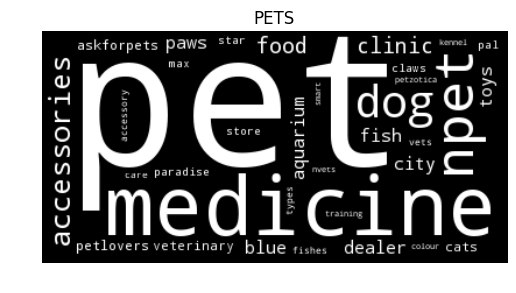

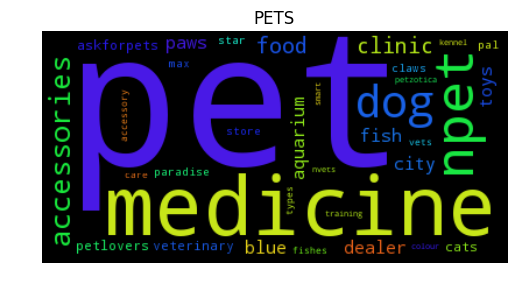

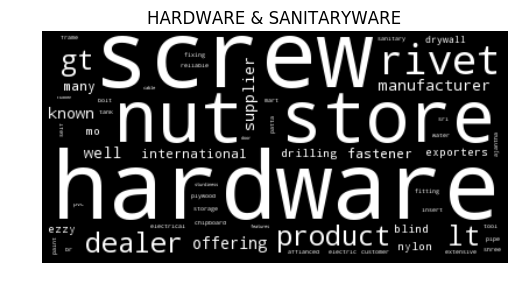

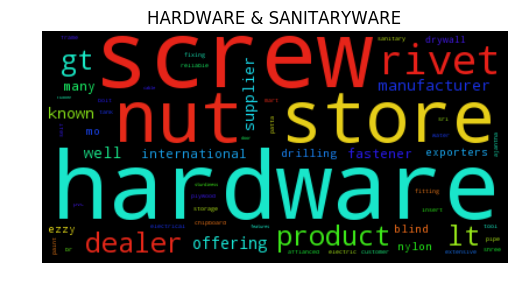

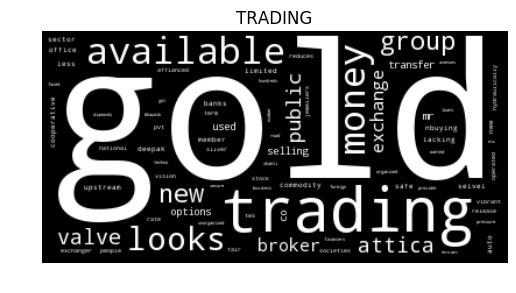

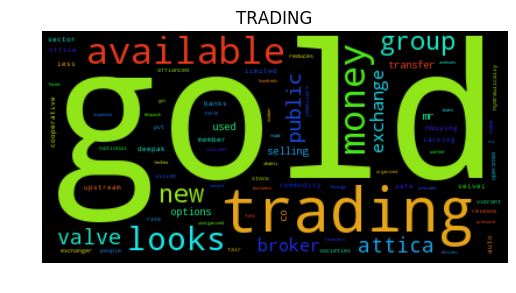

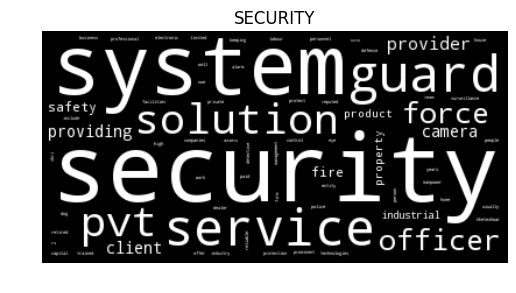

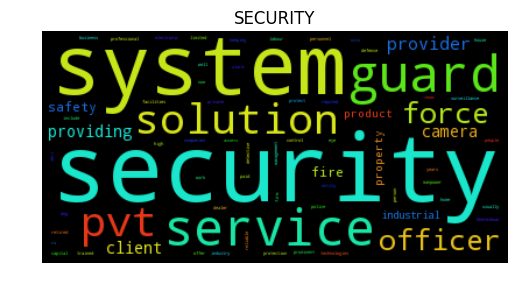

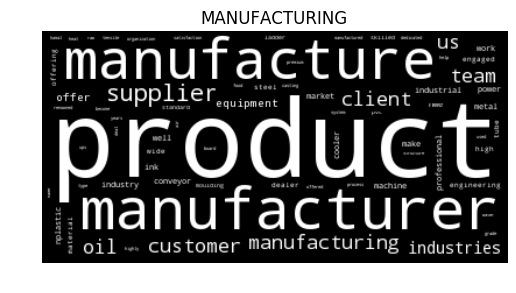

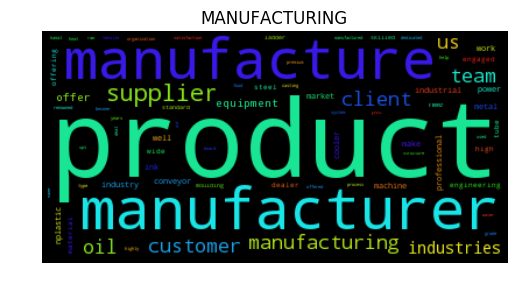

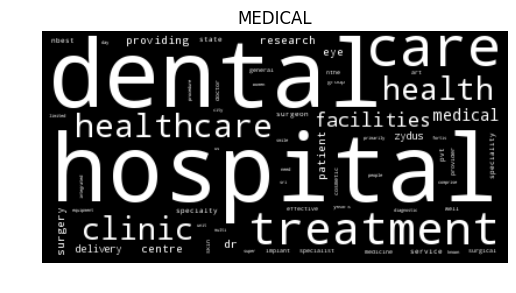

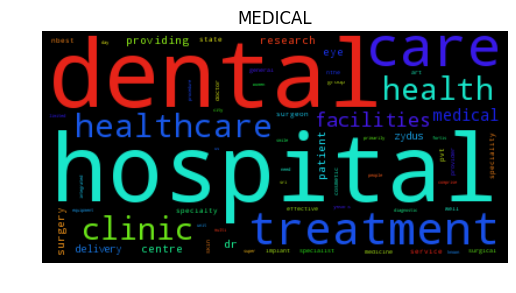

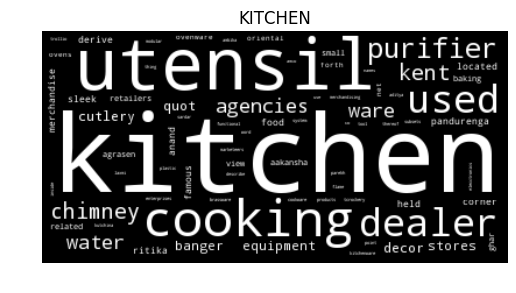

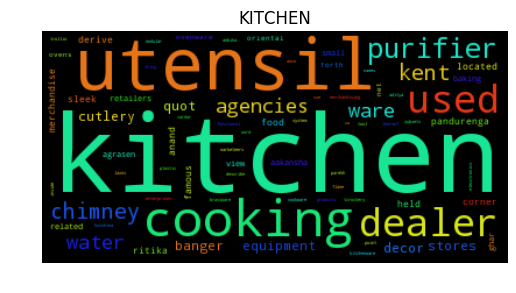

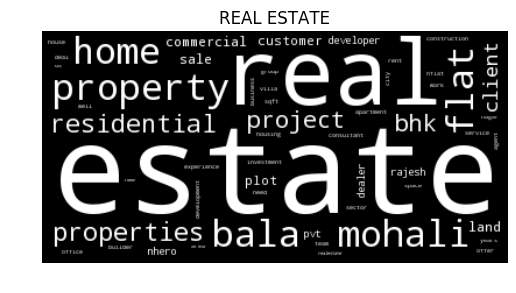

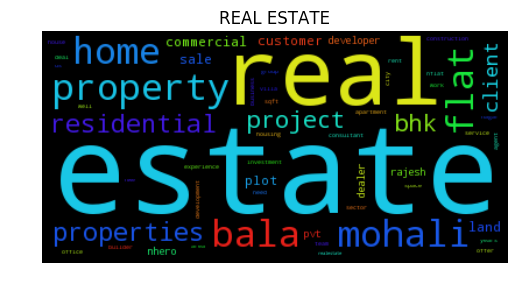

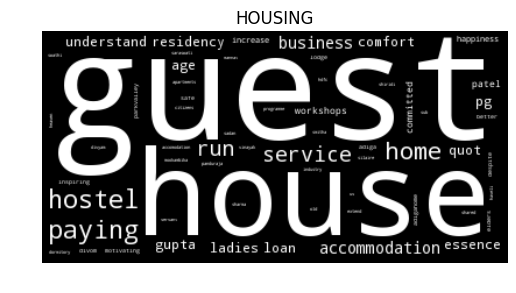

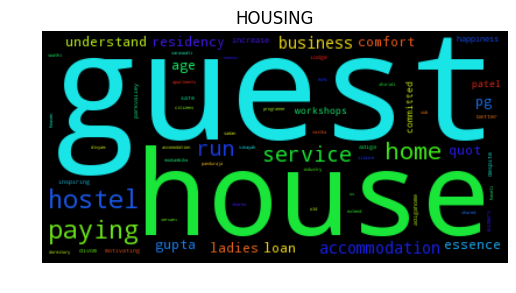

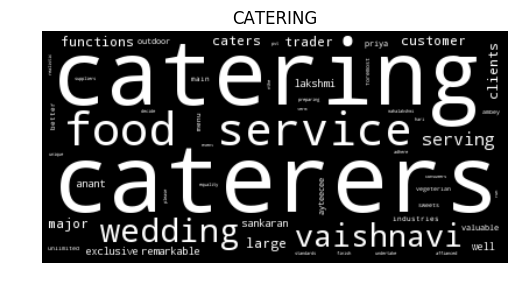

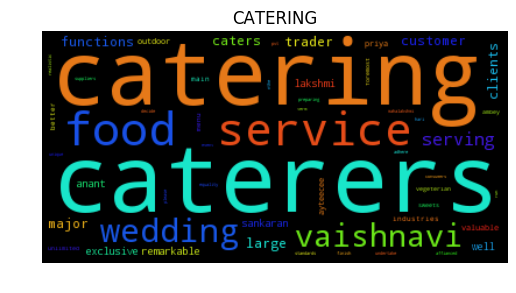

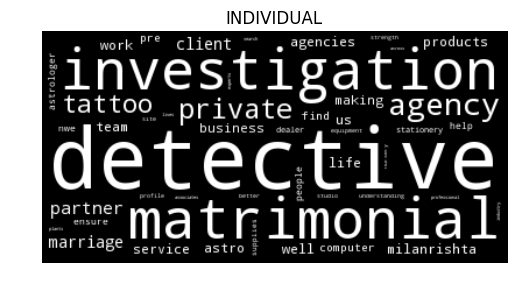

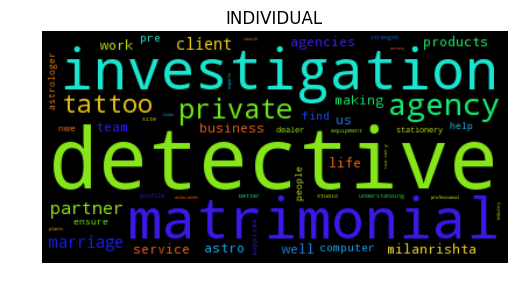

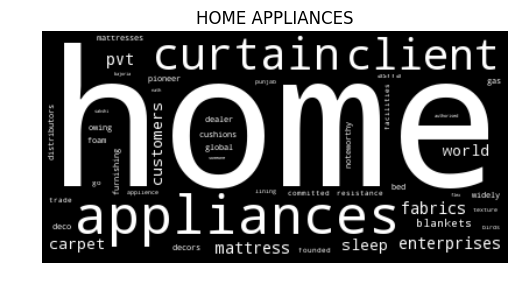

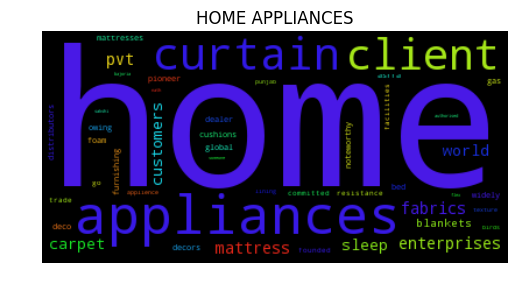

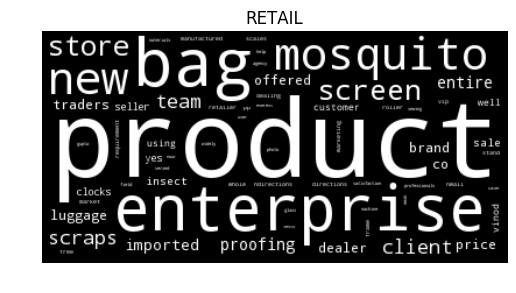

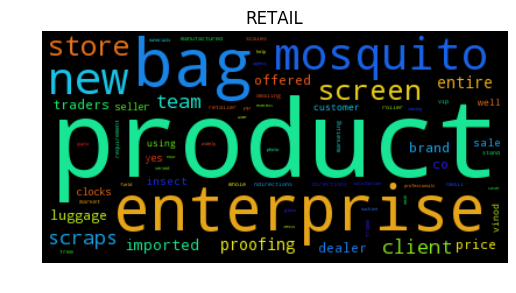

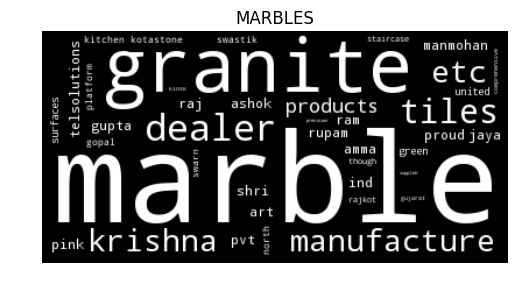

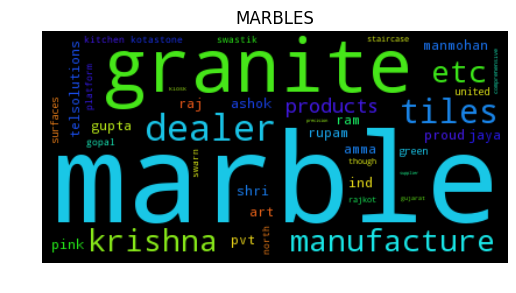

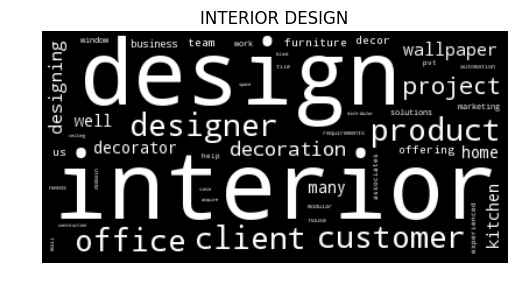

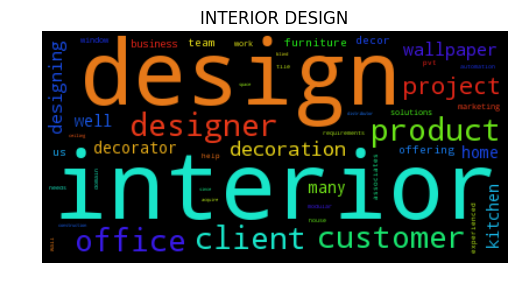

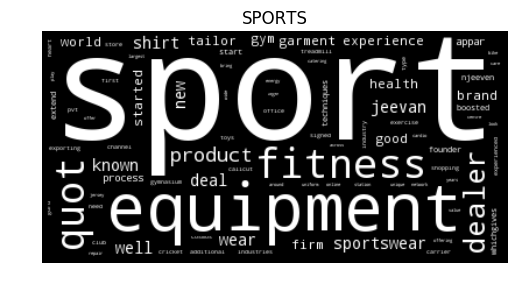

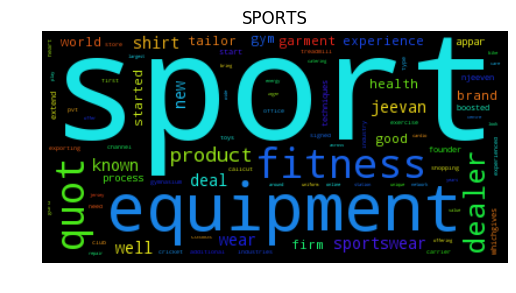

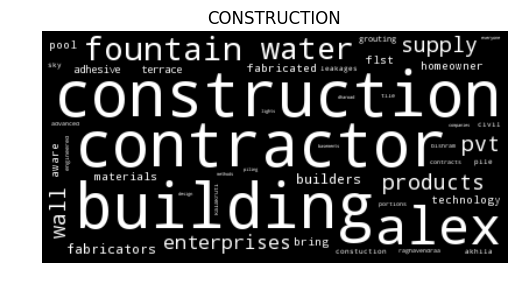

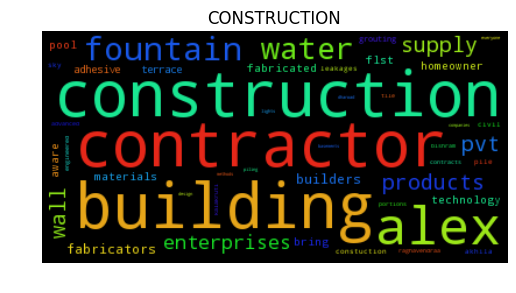

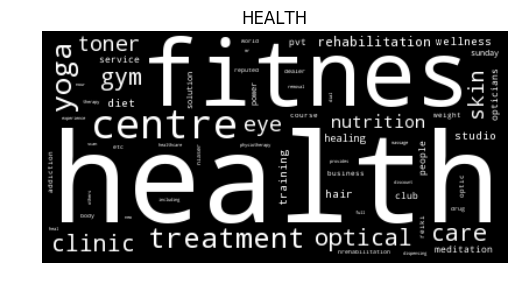

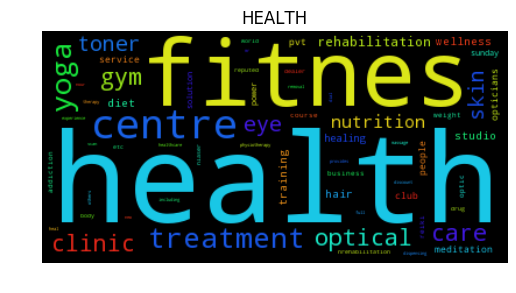

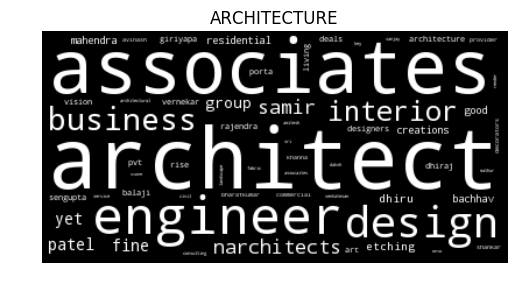

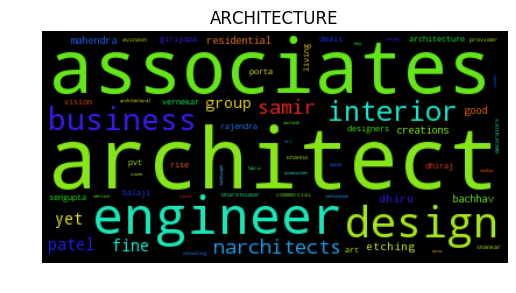

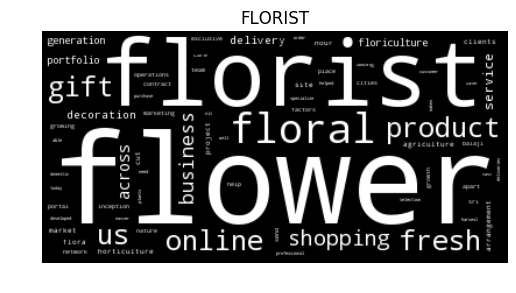

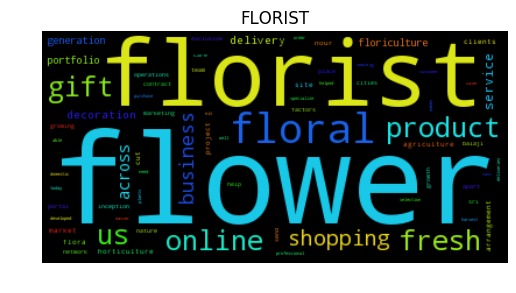

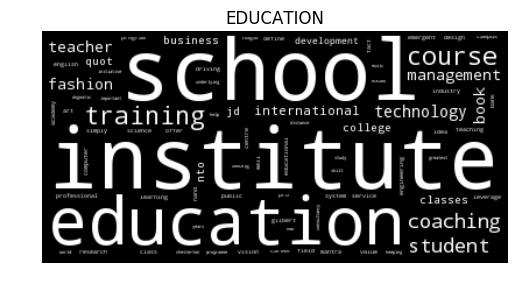

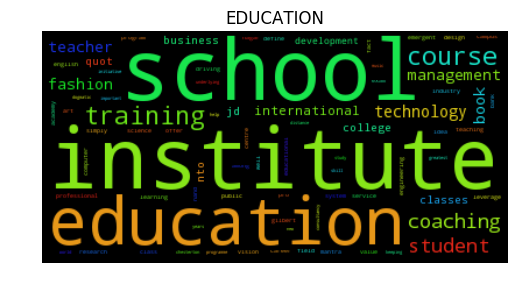

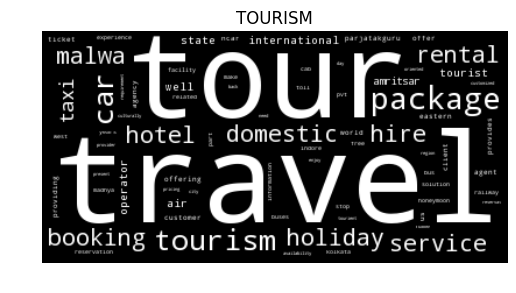

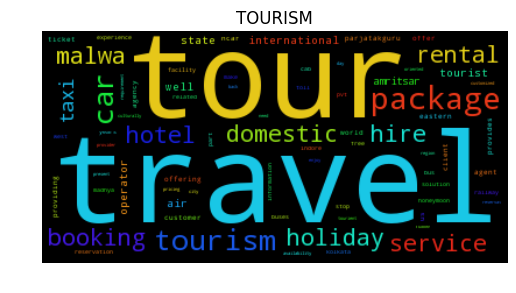

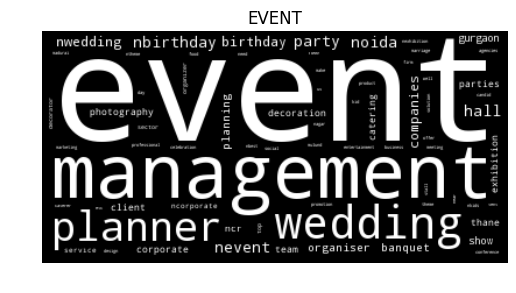

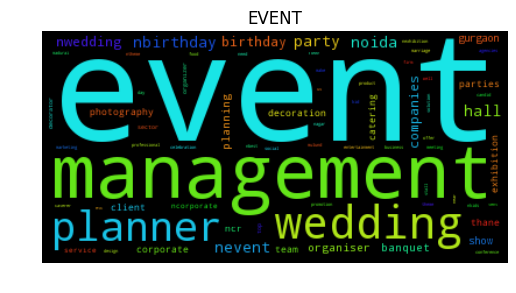

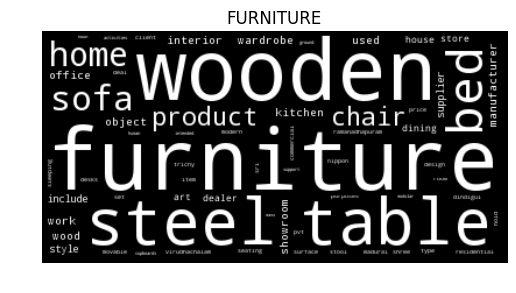

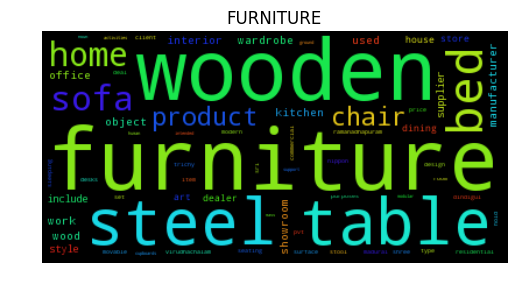

In [6]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
import sys  
import pandas as pd 
import sklearn
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import chi2

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support


import gensim, logging
from gensim.models import Word2Vec
from scipy import sparse

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(120, 200)

#d = path.dirname(__file__)



reload(sys)  
sys.setdefaultencoding('utf8')


def loadData(filePath="dataset.csv"):
	data=pd.read_csv("/home/administrator/data/categories-data/Train-Data/fps-with-cat-train.csv") 
	data['CategoryFB'] = data['CategoryFB'].fillna(data['CategoryV2'])
	data['Description'] = data['Description'].fillna(data['Name'])
	return data["Tag"],data["Description"],data["CategoryV2"]

def preProcessing(features):
    num_descs = features.size
    clean_wordlist = []
    clean_descs = []
    stops = set(stopwords.words('english'))
    more_stopwords = "based serive services amp /n /r ltd provide year company special  giving established various became 1987 range like every center best quality shop india indian complete range leading concern like time latest every one well-known also south delhi mumbai india indian bangalore hyderabad chennai"
    stops.update(more_stopwords.split())
    for i in range( 0, num_descs):
        letters_only = re.sub("[^a-zA-Z]", " ", features[i]) 
        words = letters_only.lower().split()
        words = [w.lower() for w in words if not w in stops]  
        clean_wordlist.append(words)
        clean_descs.append(" ".join(words))
    return clean_descs, clean_wordlist

tags, descs, labels = loadData()
processed_descs, processed_descs_wordlist = preProcessing(descs)

from collections import defaultdict
cdict = defaultdict(list)
for i, val in enumerate(labels):
    if val in cdict:
        cdict[val].extend(processed_descs_wordlist[i])
    else:
        value = list()
        cdict[val] = processed_descs_wordlist[i]

stopwords = STOPWORDS.copy()

#print(processed_descs_wordlist)

from collections import defaultdict
text = cdict['MEDICAL']
wtext = ",".join(text)

    
print(type(cdict['HOTEL']))
#print(type(w))
#print(text)
print(wtext)

#print(cdict['HOTEL'])



def generate_wordcloud_for_category(k, wtext):
    wc = WordCloud(max_words=15156633, stopwords=stopwords, margin=10,random_state=1).generate(wtext)
    # generate_from_frequencies()
    default_colors = wc.to_array()
    plt.title(k)
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    wc.to_file("wordcloud_figure.png")
    plt.axis("off")
    plt.figure()
    plt.title(k)
    plt.imshow(default_colors)
    plt.axis("off")
    plt.show()
    
for k, v in cdict.items():
    text = cdict[k]
    wtext = ",".join(text)
    generate_wordcloud_for_category(k, wtext)